In [1]:
from astropy.io import fits
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
biases = sorted(glob.glob("data/ccd/*BIAS*"))
biases = list(map(fits.open, biases[:10]))

In [3]:
def gaussian(x, A, var, mu):
    
    return A * np.exp(-(x - mu)**2 / (2 * var))

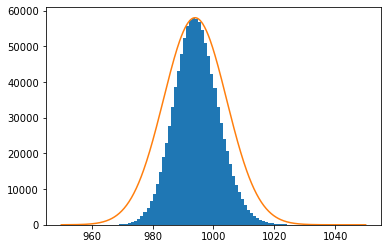

In [4]:
bias0 = biases[0][0]
bias0d = bias0.data.flatten()
bounds = 950, 1050
pmf, bins, _ = plt.hist(bias0d, bins=100, range=bounds);

avg0 = np.mean(bias0d)
mode0 = stats.mode(bias0d)[0][0]
med0 = np.median(bias0d)
std0 = np.std(bias0d)

x = np.linspace(*bounds, num=500)
gaussd = gaussian(x, max(pmf), std0**2, avg0)
plt.plot(x, gaussd);

In [5]:
nsd = np.abs((bias0d - avg0) / std0)
trimmed = bias0d[nsd < 3]

pct_bad = 100 * (1 - len(trimmed) / len(bias0d))
print(f'{pct_bad:.3f}%')

0.040%


In [6]:
elec_noise = bias0.header["EGAIN"] * std0
elec_noise

21.334021034554155

In [7]:
master = sum([bias[0].data.flatten() for bias in biases]) / len(biases)

avg = np.mean(master)
mode = stats.mode(master)[0][0]
med = np.median(master)
std = np.std(master)

std * np.sqrt(len(biases)), std0

(17.017725321416066, 10.35632089056027)